# Modelling S isotope fractionation factors
- We reproduce the modelling of https://doi.org/10.1016/j.chemgeo.2023.121325 to test our coding of the Miyoshi and Fiege model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss

## Lets calculate the different 1000 ln α values 
- We use Miyoshi et al. 1984 (https://doi.org/10.2343/geochemj.18.75) and Fiege et al (2015- 10.1016/j.chemgeo.2014.11.012)-
- We perform calculations for Temperatures ranging from 750 - 1150, and QFM values from 0 to 3 (as in Fig. 8b of Rezeau et al. 2023 - https://doi.org/10.1016/j.chemgeo.2023.121325)

In [2]:
# Set deltaQFM values
deltaQFM=np.linspace(0, 3, 100)
# Set T values
T_K=np.linspace(750, 1150)+273.15
# Calculate S6/St for these deltaQFM values using Jugo
Sprop=ss.calculate_S6St_Jugo2010_eq10(deltaQFM=deltaQFM)
# calculate fractionatoin factors for different S prop at 1100 C
df_1100=ss.calculate_S_isotope_factors(T_K=1100+273.15, S6St_Liq=Sprop)
df_1100.head()


,T_K,T_C,lna_FeS_H2S_1000_OR79,lna_S2_SO4_1000_M84,lna_H2S_SO4_1000_M84,lna_H2S_S2_1000_M84,lna_FeS_S2_1000_M84,lna_FeS_SO4_1000_M84,lna_H2S_S2_1000_F15,lna_S2_SO4_1000_F15,...,a_FeS_S2_M84,a_FeS_SO4_M84,a_S2_SO4_M84,a_S2_SO4_F15,a_FeS_H2S_OR79,a_H2S_S2_M84,a_H2S_S2_F15,a_H2S_SO4_M84,a_FeS_ST_F15_M84,a_FeS_ST_M84
0,1373.15,1100.0,0.038623,-3.734603,-3.257287,0.477317,0.51594,-3.218664,3.249013,-6.5063,...,1.000516,0.996787,0.996272,0.993515,1.000039,1.000477,1.003254,0.996748,1.003242,1.000487
1,1373.15,1100.0,0.038623,-3.734603,-3.257287,0.477317,0.51594,-3.218664,3.249013,-6.5063,...,1.000516,0.996787,0.996272,0.993515,1.000039,1.000477,1.003254,0.996748,1.003234,1.000482
2,1373.15,1100.0,0.038623,-3.734603,-3.257287,0.477317,0.51594,-3.218664,3.249013,-6.5063,...,1.000516,0.996787,0.996272,0.993515,1.000039,1.000477,1.003254,0.996748,1.003225,1.000477
3,1373.15,1100.0,0.038623,-3.734603,-3.257287,0.477317,0.51594,-3.218664,3.249013,-6.5063,...,1.000516,0.996787,0.996272,0.993515,1.000039,1.000477,1.003254,0.996748,1.003215,1.000472
4,1373.15,1100.0,0.038623,-3.734603,-3.257287,0.477317,0.51594,-3.218664,3.249013,-6.5063,...,1.000516,0.996787,0.996272,0.993515,1.000039,1.000477,1.003254,0.996748,1.003204,1.000465


In [3]:
# Calculate different fractionation factors for different temps
df_temp=ss.calculate_S_isotope_factors(T_K=T_K)
df_temp.head()

,T_K,T_C,lna_FeS_H2S_1000_OR79,lna_S2_SO4_1000_M84,lna_H2S_SO4_1000_M84,lna_H2S_S2_1000_M84,lna_FeS_S2_1000_M84,lna_FeS_SO4_1000_M84,lna_H2S_S2_1000_F15,lna_S2_SO4_1000_F15,lna_FeS_S2_1000_F15,a_FeS_S2_F15,a_FeS_S2_M84,a_FeS_SO4_M84,a_S2_SO4_M84,a_S2_SO4_F15,a_FeS_H2S_OR79,a_H2S_S2_M84,a_H2S_S2_F15,a_H2S_SO4_M84
0,1023.150000,750.000000,0.093365,-6.878921,-6.019187,0.859734,0.953098,-5.925822,7.855013,-13.874200,7.948378,1.007980,1.000954,0.994092,0.993145,0.986222,1.000093,1.000860,1.007886,0.993999
1,1031.313265,758.163265,0.091165,-6.767457,-5.921280,0.846177,0.937342,-5.830115,7.691734,-13.613013,7.782899,1.007813,1.000938,0.994187,0.993255,0.986479,1.000091,1.000847,1.007721,0.994096
2,1039.476531,766.326531,0.089034,-6.658609,-5.825670,0.832939,0.921973,-5.736636,7.532286,-13.357956,7.621320,1.007650,1.000922,0.994280,0.993364,0.986731,1.000089,1.000833,1.007561,0.994191
3,1047.639796,774.489796,0.086969,-6.552295,-5.732286,0.820009,0.906978,-5.645317,7.376551,-13.108837,7.463520,1.007491,1.000907,0.994371,0.993469,0.986977,1.000087,1.000820,1.007404,0.994284
4,1055.803061,782.653061,0.084967,-6.448438,-5.641060,0.807378,0.892345,-5.556093,7.224414,-12.865474,7.309381,1.007336,1.000893,0.994459,0.993572,0.987217,1.000085,1.000808,1.007251,0.994375


In [4]:
np.exp((df_1100['lna_FeS_H2S_1000_OR79']+df_1100['lna_FeS_SO4_1000_M84'])/1000)

0     0.996825
1     0.996825
2     0.996825
3     0.996825
4     0.996825
        ...   
95    0.996825
96    0.996825
97    0.996825
98    0.996825
99    0.996825
Length: 100, dtype: float64

## Now lets plot to match the figure of Rezeau et al. (2015)

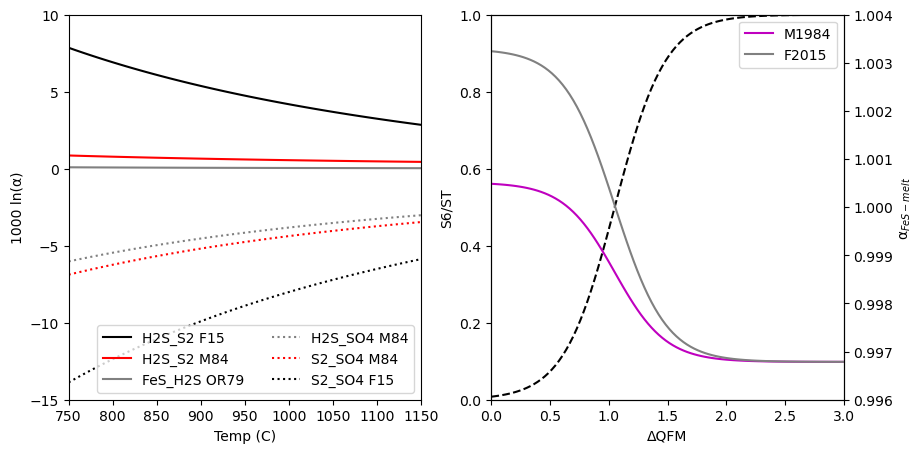

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(T_K-273.15, df_temp['lna_H2S_S2_1000_F15'], '-', color='black', label='H2S_S2 F15')
ax1.plot(T_K-273.15, df_temp['lna_H2S_S2_1000_M84'], '-', color='red', label='H2S_S2 M84')
ax1.plot(T_K-273.15, df_temp['lna_FeS_H2S_1000_OR79'], '-', color='grey', label='FeS_H2S OR79')
ax1.plot(T_K-273.15, df_temp['lna_H2S_SO4_1000_M84'], ':', color='grey', label='H2S_SO4 M84')
ax1.plot(T_K-273.15, df_temp['lna_S2_SO4_1000_M84'], ':', color='red', label='S2_SO4 M84')
ax1.plot(T_K-273.15, df_temp['lna_S2_SO4_1000_F15'], ':', color='black', label='S2_SO4 F15')

ax1.legend(ncol=2)
ax1.set_xlabel('Temp (C)')
ax1.set_ylabel('1000 ln(α)')
ax1.set_xlim([750, 1150])
ax1.set_ylim([-15, 10])

ax3=ax2.twinx()
ax2.plot(deltaQFM, Sprop, '--k', label='Sulfur speciation curve') 
ax3.plot(deltaQFM, df_1100['a_FeS_ST_M84'], '-m', label='M1984')
ax3.plot(deltaQFM, df_1100['a_FeS_ST_F15_M84'], '-', color='grey', label='F2015')

# ax3.plot(deltaQFM, df_1100['test_M'], ':r', label='M1984 their method')
# ax3.plot(deltaQFM, df_1100['test_F'], ':k', label='F2015 their method')
ax3.legend()
ax2.set_ylabel('S6/ST')
ax2.set_xlabel('ΔQFM')
ax3.set_ylabel('α$_{FeS-melt}$')
ax2.set_ylim([0, 1])
ax3.set_ylim([0.996, 1.004])
ax2.set_xlim([0, 3])
fig.savefig('S fractionatoin test.png', dpi=200, transparent=True)